In [1]:

from neuralogic.nn import get_evaluator
from neuralogic.core import R, Template, V, C, Settings, Transformation, Combination, Aggregation
from neuralogic.core.constructs.function.tree import FunctionContainer
from neuralogic.core.settings import Settings
from neuralogic.dataset import Dataset
from neuralogic.optim import SGD

F = FunctionContainer()
train_dataset = Dataset()
template = Template() 

C:\Users\kraus\Plocha\BAK\PyNeuraLogicFork\neuralogic\core\builder\builder.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


printing metadata
[<neuralogic.core.constructs.function.function.Combination object at 0x000002771E854C00>, <neuralogic.core.constructs.function.function.Transformation object at 0x000002771E854340>, <neuralogic.core.constructs.function.function.Aggregation object at 0x000002771E854F80>]
WARNING - 962
new map:
{}
initialized map:
{aggregation=avg, transformation=relu, combination=sum}


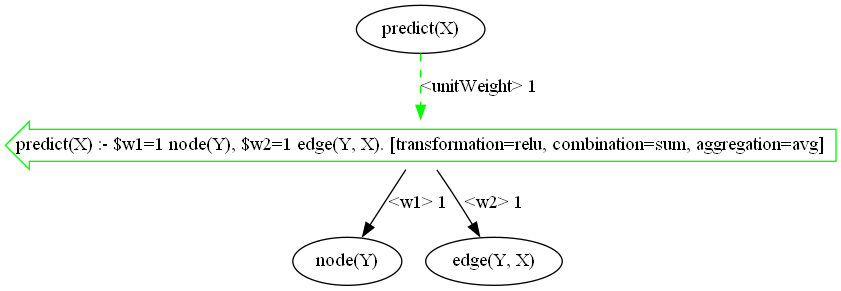

In [2]:
train_dataset.add_examples(
    [
        R.node(C.a)[1], R.node(C.b)[2], R.node(C.c)[3],
        R.edge(C.a, C.b)[5], R.edge(C.b, C.a)[5], R.edge(C.a, C.c)[5], R.edge(C.c, C.a)[5]
    ]
)

template += (R.predict(V.X) <= (R.node(V.Y)["w1": 1], R.edge(V.Y, V.X)["w2": 1])) | [Combination.SUM, Transformation.RELU, Aggregation.AVG]
#template += (R.message2(V.X)[5,10] <= F.avg[F.relu(R.message1(V.Y)[10,20] + R.edge(V.Y, V.X))])

train_dataset.add_queries([
    R.predict(C.a)["w3": 1]
])
template.draw()

In [3]:
settings = Settings(optimizer=SGD(), epochs=1)

neuralogic_evaluator = get_evaluator(template, settings)

build_dataset = neuralogic_evaluator.build_dataset(train_dataset)

for _ in neuralogic_evaluator.train(train_dataset):
    pass

WARNING - 962
new map:
{}
initialized map:
{aggregation=avg, transformation=relu, combination=sum}


Exception: The size of examples 7 doesn't match the size of queries 1